# Let's make things pretty!

Color! Texture! Style! Not only do we want to make our plots aesthetically appealing, we often want to show more than just one or two variables on our plot. Cartographer Jacques Bertin developed the following recommendations for encoding visual information (and yes, Matplotlib supports all of these visual encodings):

![table describing how points, lines, and area can be encoded with different attributes such as shape, size, hue, value, and intensity to show differences in the data](../images/retinal-variables.png)

J. Krygier and D. Wood, Making Maps: A Visual Guide to Map Design for GIS, 1 edition. New York: The Guilford Press, 2005.


# New notebook, same imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The titanic dataset has no continuous data, so here we demonstrate manipulating a line plot using sine waves. We use the numpy library to generate our sine and cosine waves. Here the x values are 1000 values equally spaced between 0 and 2$\pi$

# Let's make a line plot

In [2]:
x = np.linspace(0,2*np.pi, 100)
sin_x = np.sin(x)

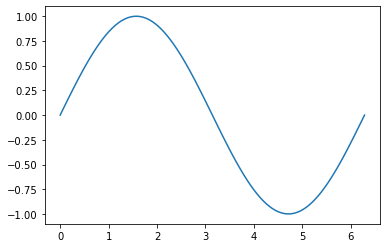

In [3]:
fig, ax = plt.subplots()
_ = ax.plot(x, sin_x)

### Set the aspect ratio

The x and y on a sin curve should have equal aspect because they are in the same units. To reflect this in our visualization, we use the .set_aspect function

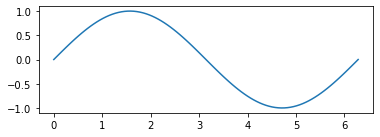

In [4]:
fig, ax = plt.subplots()
_ = ax.plot(x, sin_x)
_ = ax.set_aspect('equal')

# What are the points being plotted?

We can use the marker *kwarg* to put a marker at every x,y pair. You can find a listing of marker styles in the [marker reference](https://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html) or make [custom markers](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/marker_reference.html). We make the figure using the `figsize=(h,w)` kwarg so that we can see the markers. 

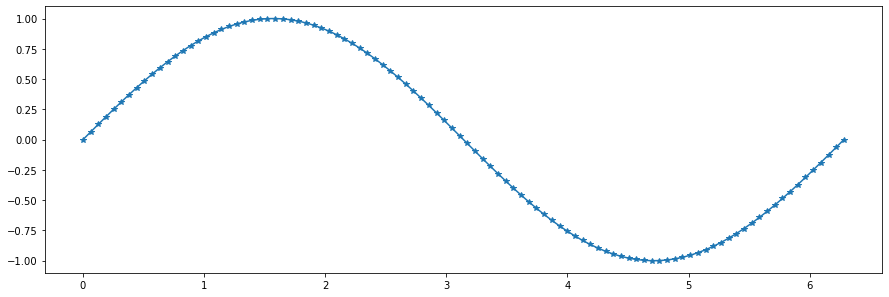

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
_ = ax.plot(x, sin_x, marker='*')
_ = ax.set_aspect('equal')

# Let's change colors

It's hard to see the markers and the lines, so we can change the colors of our marker or lines (or both). We are modifying the following parameters here:
* `color` - changes the color of the line
* `markerfacecolor` - changes the face color of the marker
* `markeredgecolor` - changes the edge color of the marker 

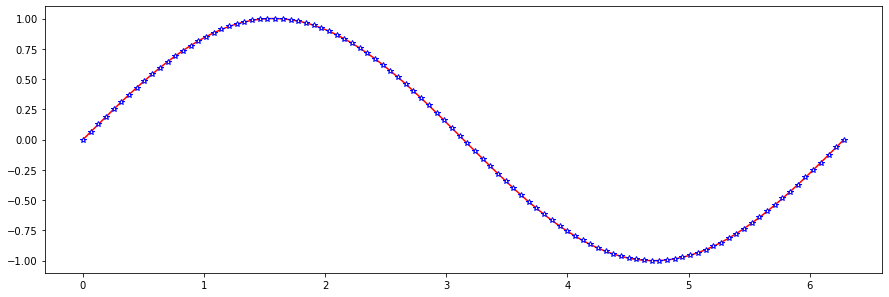

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
_ = ax.plot(x, sin_x, marker='*', markerfacecolor='white', markeredgecolor='blue', color='red')
_ = ax.set_aspect('equal')

# Let's modify the size

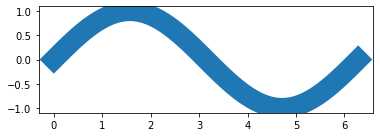

In [7]:
fig, ax = plt.subplots()
_ = ax.plot(x, sin_x, markersize=20, linewidth=20)
_ = ax.set_aspect('equal')

# Let's change up the whole line by adding texture

Sometimes we need to do vary the texture of the line. We can do this using the [linestyles parameter](https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html#sphx-glr-gallery-lines-bars-and-markers-linestyles-py)

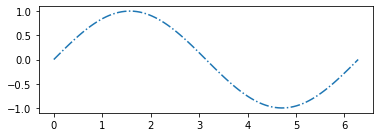

In [8]:
fig, ax = plt.subplots()
_ = ax.plot(x, sin_x, markersize=20, linestyle='-.')
_ = ax.set_aspect('equal')

# Let's digitally sample our sin curve

Sometimes our data is sampled at step intervals and we want to reflect that in our line. We can do this using the [`drawstyle` parameter](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html?highlight=drawstyle#matplotlib.lines.Line2D.set_drawstyle). 

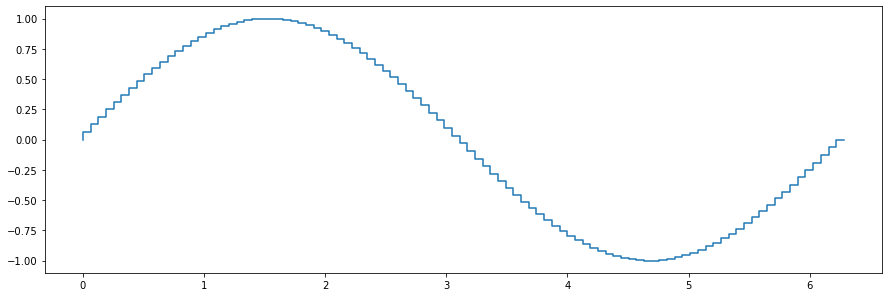

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
_ = ax.plot(x, sin_x, drawstyle='steps')
_ = ax.set_aspect('equal')

# Let's add a legend

We add a legend using the `label` parameter. Then we use `ax.legend` to display the legend. More information on customizing the legend position and appearance can be found in the [legend guide](https://matplotlib.org/3.1.0/tutorials/intermediate/legend_guide.html). 

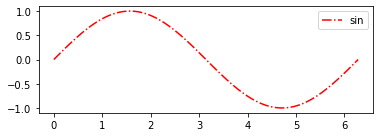

In [10]:
fig, ax = plt.subplots()
_ = ax.plot(x, sin_x, markersize=20, linestyle='-.', color='red', label='sin')
_ = ax.set_aspect('equal')
_ = ax.legend()

# Put it all together
1. add a *cosine* plot to the axis (hint: ax.plot(x, ...)) is totally acceptable)
3. make the *cosine* line bigger than the sin 
2. style the *cosine* as a dotted line (hint ':' is the short code for dotted)
3. color the *cosine* line purple
4. label the *cosine* and display the legend

In [11]:
# work through the practice

# Let's go back to our passenger records

Let's do a little data cleaning using the `.dropna` method, which here drops any row containing a NaN. 

In [11]:
df = pd.read_csv("http://bit.ly/tcsv19").dropna()

You can use `df.head()` to take a quick peak at the data.  This is helpful to remind ourselves what the column names and datatypes are!

In [12]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


# First let's display some data using scatter

Here we are going to compare the age of the passengers to the fare they paid, because we want to see if there is a correlation. Traditionally scatter plots are used for these types of plots. Scatter takes the x and y plot
Scatter can show 4 dimensions of data as users can encode variables as the x and y positions, size and color of the markers in one call of the function, and you can modify the shape via multiple calls to scatter. 

To start with, lets plot the passenger age against the fare paid:

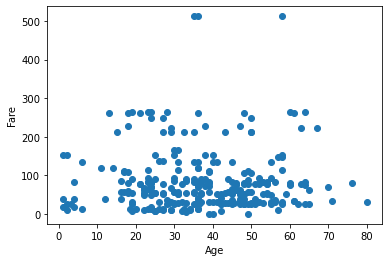

In [13]:
fig, ax = plt.subplots()
_ = ax.scatter(df['age'], df['fare'])
_ = ax.set_xlabel('Age')
_ = ax.set_ylabel('Fare')

# Simplify code using the data kwarg

The `data` kwarg takes in any labeled data (dictionary, dataframe, record array, etc) and unpacks it for you based on the labels passed in as x, y, etc, kwargs. 

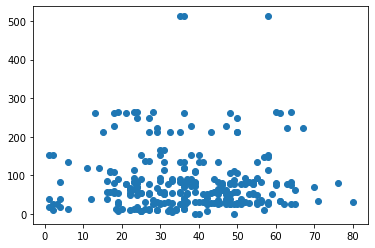

In [14]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', data=df)

# Label all the things using set

Setting each label individually using the .set_ methods can get tedious, so there's a meta-set function you can use to set all the labels in one shot. 

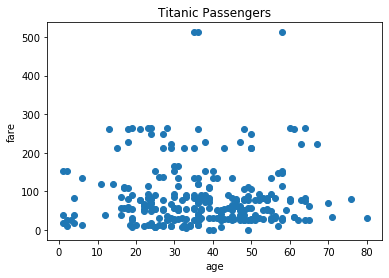

In [16]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', data=df)
_ = ax.set(xlabel='age', ylabel='fare', title='Titanic Passengers')

# Let's change the color

While that blue is lovely, sometimes we might want our dots to be a different color. Here we will use the color *kwarg* to change the color of our dots to hotpink. 

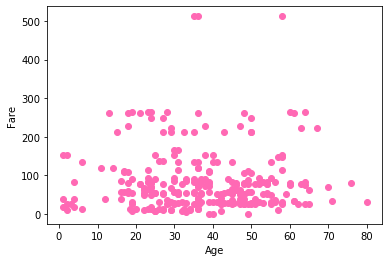

In [17]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', color='hotpink', data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')


# Let's encode data using color

Is there a difference in age and fare between people who survived and people who didn't? Here we will color the dots based on the survived column (remember 0 is dead and 1 is alive) using the `c` keyword arg. . The colors are yellow and purple because they are from the default [matplotlib colormap](https://matplotlib.org/examples/color/colormaps_reference.html) Viridis.

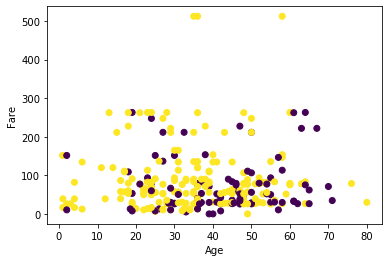

In [18]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', c='survived', data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')


# Lets customize those colors

The viridis colormap is designed for quantitative datasets and survived is categorical. Instead of using the default, let's use a categorical colormap to make things prettier. You can find a full list of colormaps at the [colormap reference ](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). 

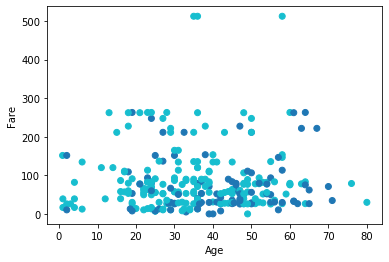

In [19]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', c='survived', cmap='tab10', data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')

Still not great, so we're going to create a `ListedColormap` so we can set the colors manually. We get the [listed colormap](https://matplotlib.org/api/_as_gen/matplotlib.colors.ListedColormap.html) from the [colors module](https://matplotlib.org/api/colors_api.html).

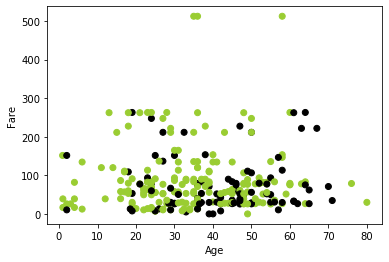

In [20]:
import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(['black', 'yellowgreen'])
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', c='survived', cmap=cmap, data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')

# Let's add a legend

We can't just use the label parameter here because we get one label per call of the `scatter` function and here we need multiple labels. Instead, we can make use of the fairly new [scatter legend](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_with_legend.html#automated-legend-creation) functionality to generate a label based on the colors. Here we assign the output of ax.scatter to the `sc` variable because will need to use the sc object to generate the legend.

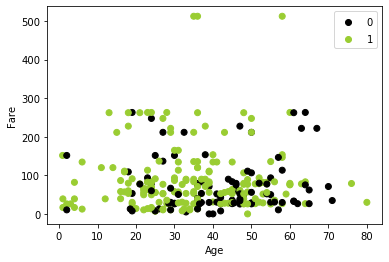

In [36]:
fig, ax = plt.subplots()
sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')
_ =  ax.legend(*sc.legend_elements())

## Lets add custom labels

`sc.legend_elements()` returns two lists:
* handles: plot objects displayed in the legend (in this case the scatter points)
* labels: the label attached to each handle

In  this case, labels are 0 and 1 because that's what was passed in as the color, so we overwrite the default labels with our custom ones.

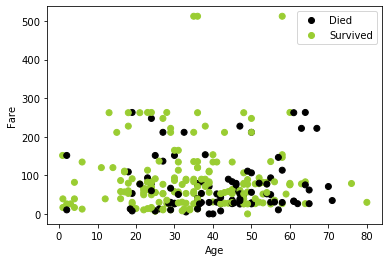

In [35]:
fig, ax = plt.subplots()
sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')
_ =  ax.legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

## Pre Matplotlib 3.1 version

Scatter's legend_elements() is a new feature in Matplotlib and so may not be on your computer. Another way to set the legend would be to segment the data and use the label parameter.

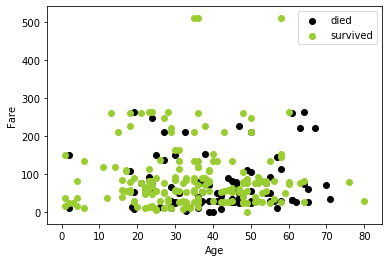

In [34]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', c='black', cmap=cmap, data=df[df['survived']==0], label='died')
_ = ax.scatter('age', 'fare', c='yellowgreen', cmap=cmap, data=df[df['survived']==1], label='survived')
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')
_ =  ax.legend()

# Let's clean up a bit because large dataset

Lets add some transparency using the alpha keyword because there are a lot of dots. Then we set the border of our dots to black to get some definition.

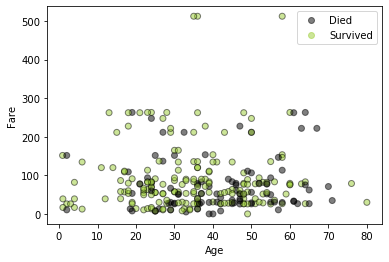

In [40]:
fig, ax = plt.subplots()
sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, edgecolor='black', data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')
_ =  ax.legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

# Encode even more information: Bubble Chart

Is there a pattern in age and fare and survival...and the passenger class? We can encode one more variable (in this case `pclass`) as the size of the point. 

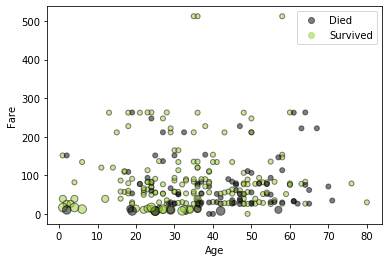

In [47]:
fig, ax = plt.subplots()
sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, 
                edgecolor='black', s = df['pclass']*25, data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')
_ =  ax.legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

# Visual Overload: markers

We're not done yet, because we can still encode the shape of the point! Here we have to use two seperate functional calls to scatter to set the markers. Lets see how sex (as recorded in these logs) factors into survival rates.

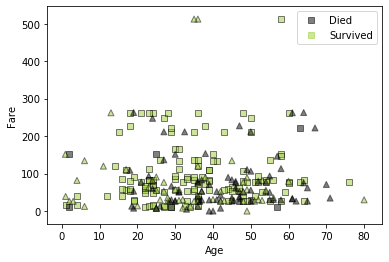

In [69]:
fig, ax = plt.subplots()

sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, edgecolor='black', 
                marker='s',label='Female', data=df[df['sex'].str.match('female')])
sc2 = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, edgecolor='black', 
                marker='^',label='male', data=df[df['sex'].str.match('male')])

_ = ax.set(xlabel = 'Age', ylabel = 'Fare')
_ =  ax.legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

# Putting it all together: Information overload
As a reminder, these are the variables in the dataset:
* categorical: 'pclass', 'survived', 'sex', 'embarked'
* quantitative: 'age', 'sibsp', 'parch', 'fare',
* qualitative: 'name',  'ticket',  'cabin',

Create a scatter plot exploring the relationship between:
1. family size and fare and age and survival
2. can you throw in an additional variable?
3. what interactions are you interested in unpacking? post your figure to the slack

# Seperate a bit, but interact

At a certain point, there are diminishing returns to trying to to cram more information into one scatter plot. Instead, matplotlib supports linking two plots together via the sharex/sharey parameters to `plt.subplots`. Here it's used to link two plots, one for each sex. 

<IPython.core.display.Javascript object>


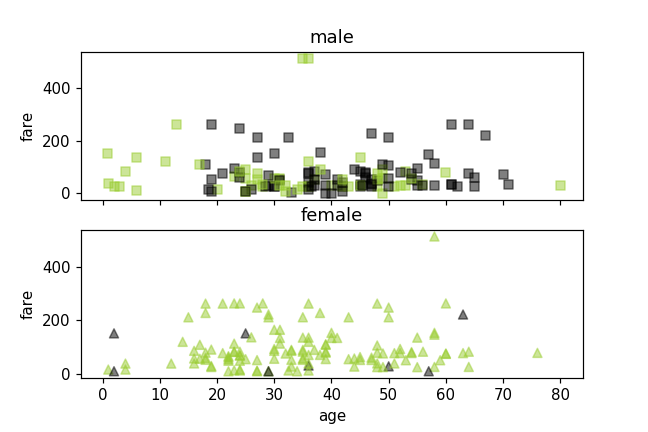

In [79]:
%matplotlib widget
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
x, y, c, s = 'age', 'fare', 'survived', 'pclass'

_ = ax1.scatter(x, y, c=c, cmap=cmap, alpha=.5,  marker='s', data=df[df['sex'] =='male'])
_ = ax2.scatter(x, y, c=c, cmap=cmap, alpha=.5, marker='^', data=df[df['sex'] =='female'])
_ = ax1.set(ylabel=y, title='male')
_ = ax2.set(xlabel=x, ylabel=y, title='female')


## Putting it all together extra: Dashboard

Create an interactive dashboard that combines the figure above with a broken out version of your information overloaded plot.